# HW2
Name: Jonathan Reyes

#### Problem Statement question
### Is this a classification or regression task and why?
This is a classification task because the goal is to predict whether a person is prone to a heart attack in which the outcome is a binary outcome (0 or 1). Which is suitable for classification models since they are used when the target variable consists of discrete categories unlike regression which is used for continuous numerical predictions that is not consistent of a binary outcome.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
data_df = pd.read_csv("data.csv")
data_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
data_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
data_df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [43]:
unique_count = data_df.nunique()
print(unique_count)
total_unique_count = unique_count.sum()
print(f"Total unique count: {total_unique_count}")


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64
Total unique count: 400


In [44]:
data_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Step 1 Questions
### How many observations are there in total?
There is a total of 303 observations in this data set
### Are there any missing values?
There is no missing values in the data set as all the columns are filled with 303 non null values
### How many unique values are in each column?
There is a total of 400 unique values across all of the columns, with the following being the column with the corresponding unique values ===
    "age": 41,
    "sex": 2,
    "cp": 4,
    "trtbps": 49,
    "chol": 152,
    "fbs": 2,
    "restecg": 3,
    "thalachh": 91,
    "exng": 2,
    "oldpeak": 40,
    "slp": 3,
    "caa": 5,
    "thall": 4,
    "output": 2
### Which columns will you treat as categorical, which will you take as continious, and why?
The columns that I have chosen for categorical values are sex, cp, fbs, restecg, exng, slp, caa, thall, and output since these are all columns that are groups or classifications in comparison to the numerical columns like age trtbps, chol, thalachh, oldpeak which are all numerical continious values that can be measured.

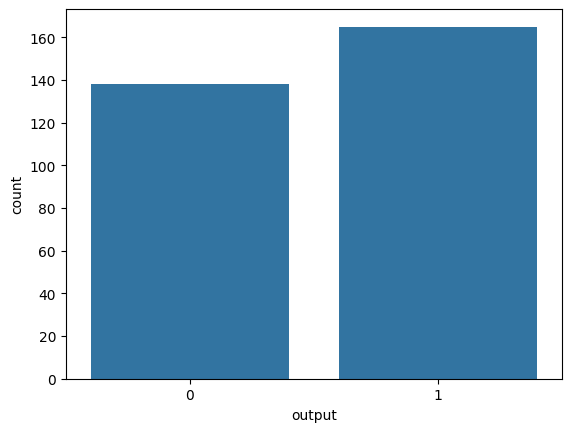

In [45]:
sns.countplot(x=data_df["output"])
plt.show()

In [46]:
data_df["output"].value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

## Step 2 Questions

### Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.
The dataset is not balanced, there is a slight inbalance in which there is more people that are prone to heart attacks than people that are not prone to heart attacks
### Is working with a balanced dataset important? Why or why not?
Working with a balanced dataset is important because it ensures that the model will be reliable, if the dataset is imbalanced the models that are built using that dataset can be biased to the classes or features that are favored due to the imbalanced, leading to false negatives for example in this dataset which can be dangerous
### How can we deal with an imbalanced dataset?
There is several ways that we can deal with imbalanced datasets, we can use Synthetic minority oversampling technique to balance the dataset, we can undersample the majority class or we can do hybrid sampling. Anomaly detection can also be used and weighted features to give more importance to the minority class.

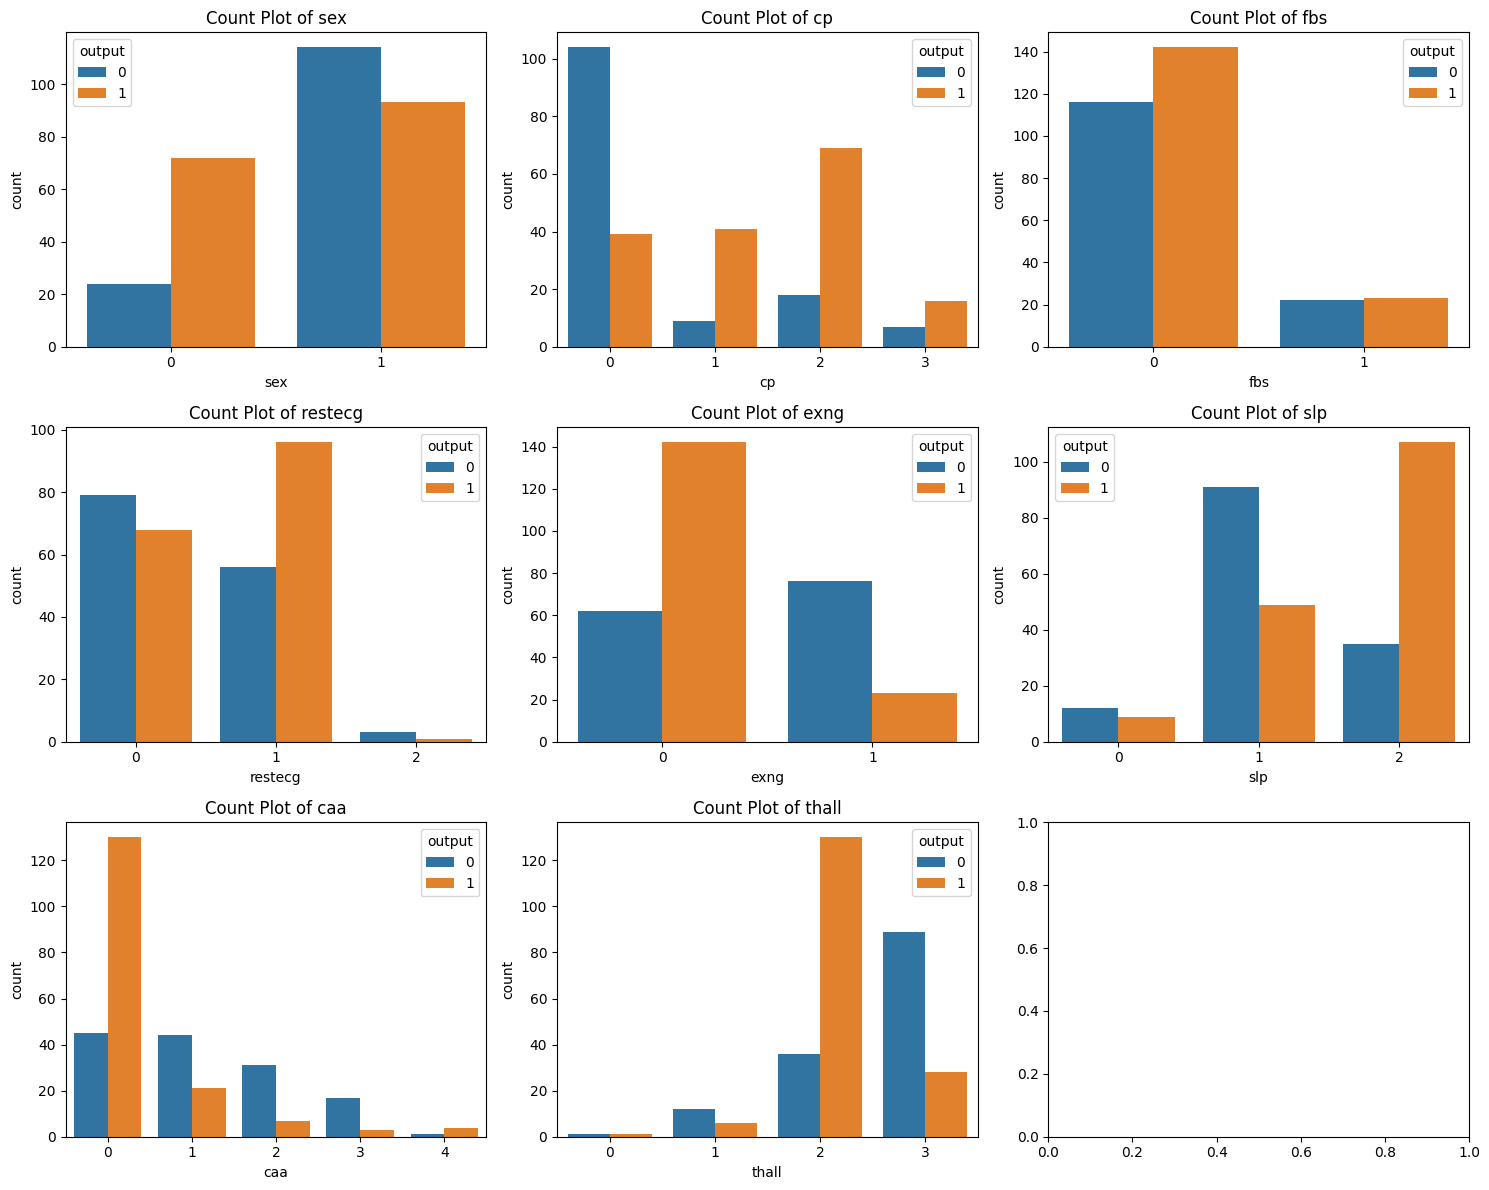

In [47]:
# List of categorical variables
categorical_vars = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_df, hue="output", ax=axes[i])
    axes[i].set_title(f"Count Plot of {var}")

plt.tight_layout()
plt.show()



## Step 3 questions
### What can you conclude about the plots you created, are there any interesting findings?
From looking at the plots we can observe that patients with better outcomes (output=1) typically have a younger age for example the median is 52 in comparison to 58 for worst outcomes, significantly higher maximum heart rates have a median of 160 in compariosn to 140 in patients who have better outcomes, and notably lower ST depression during exercise (median near 0 vs ~1.4). Surprisingly, traditional cardiovascular risk factors like blood pressure and cholesterol show minimal separation between outcome groups, suggesting they may be less predictive than exercise-related cardiac measurements in this dataset making it a very interesting finding.

In [48]:
""" for col in ["age", "trtbps", "chol", "thalachh", "oldpeak"]:
    sns.boxplot(x=data_df["output"], y=data_df[col])
    plt.show() """


' for col in ["age", "trtbps", "chol", "thalachh", "oldpeak"]:\n    sns.boxplot(x=data_df["output"], y=data_df[col])\n    plt.show() '

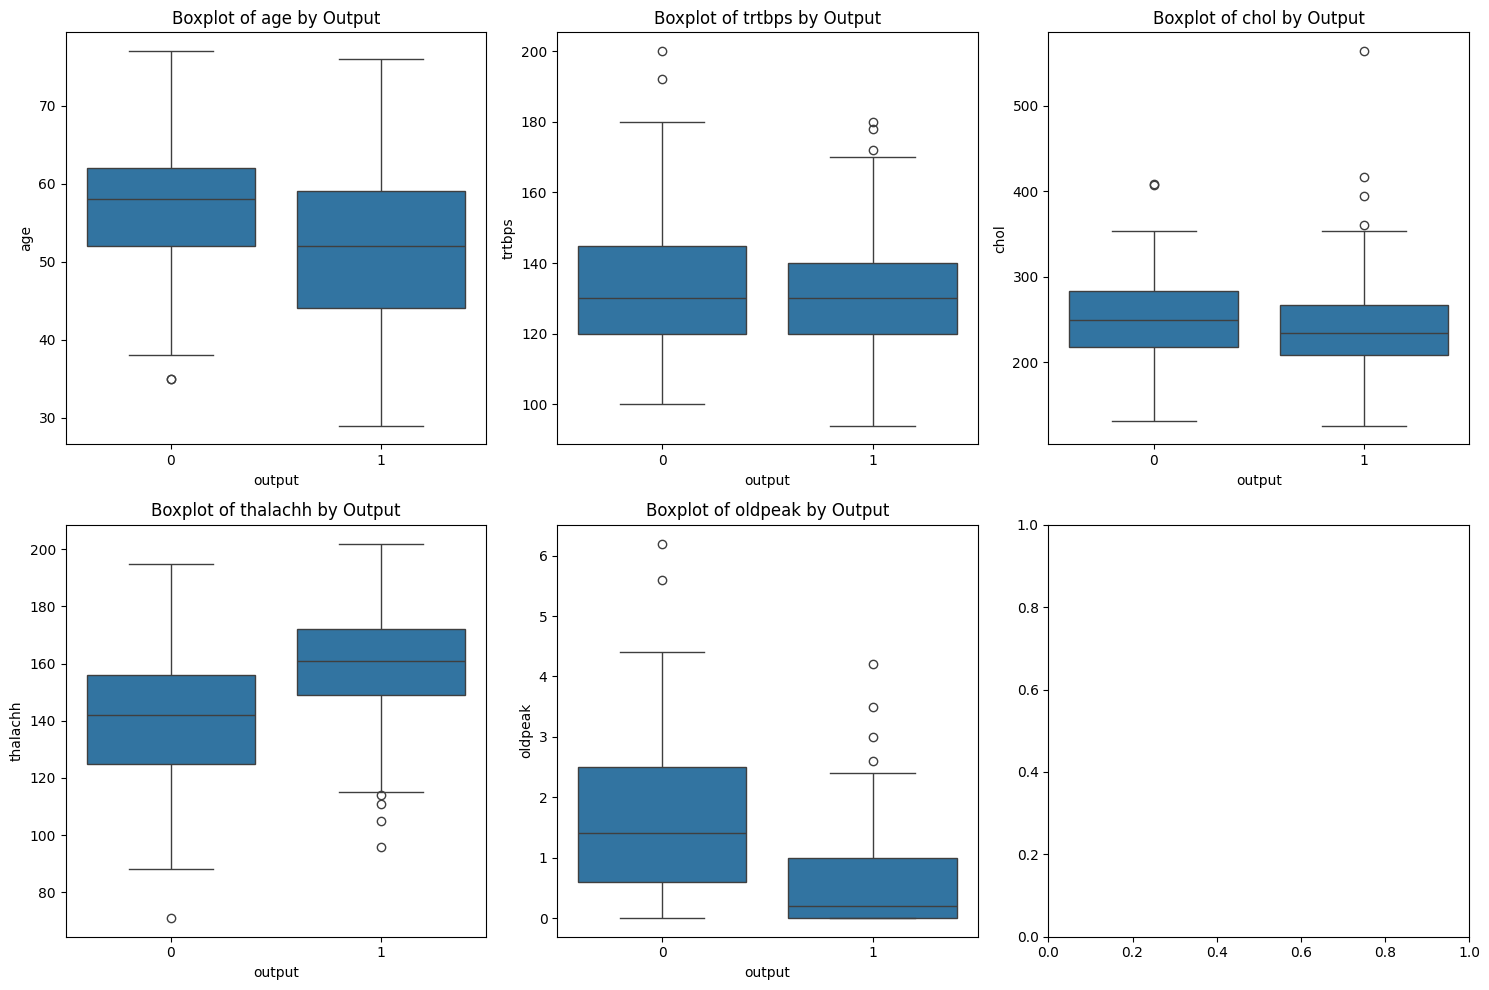

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate

for i, var in enumerate(continuous_vars):
    sns.boxplot(x="output", y=var, data=data_df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {var} by Output")

plt.tight_layout()
plt.show()

## Step 4 questions
### what can you conclude from the plots you created, are there any interesting findings?
From the boxplots it can be seen that oldpeak is notably lower in individuals with heart disease making it a strong predictor for cardiovascular disease. While Thalachh (max heart rate) is higher in heart disease patients which is unexpected and surprising find when analysing the plots. Cholesterol shows no clear distinction between groups, suggesting it may not be a strong indicator which is also interesting since it is normally a heavy factor in cardiovascular disease. Also resting blood pressure (trtbps) and age have similar distributions in both groups, there are also more high blood pressure outliers in heart disease cases. Overall, oldpeak and thalachh seem to be the most influential factors in distinguishing heart disease presence.

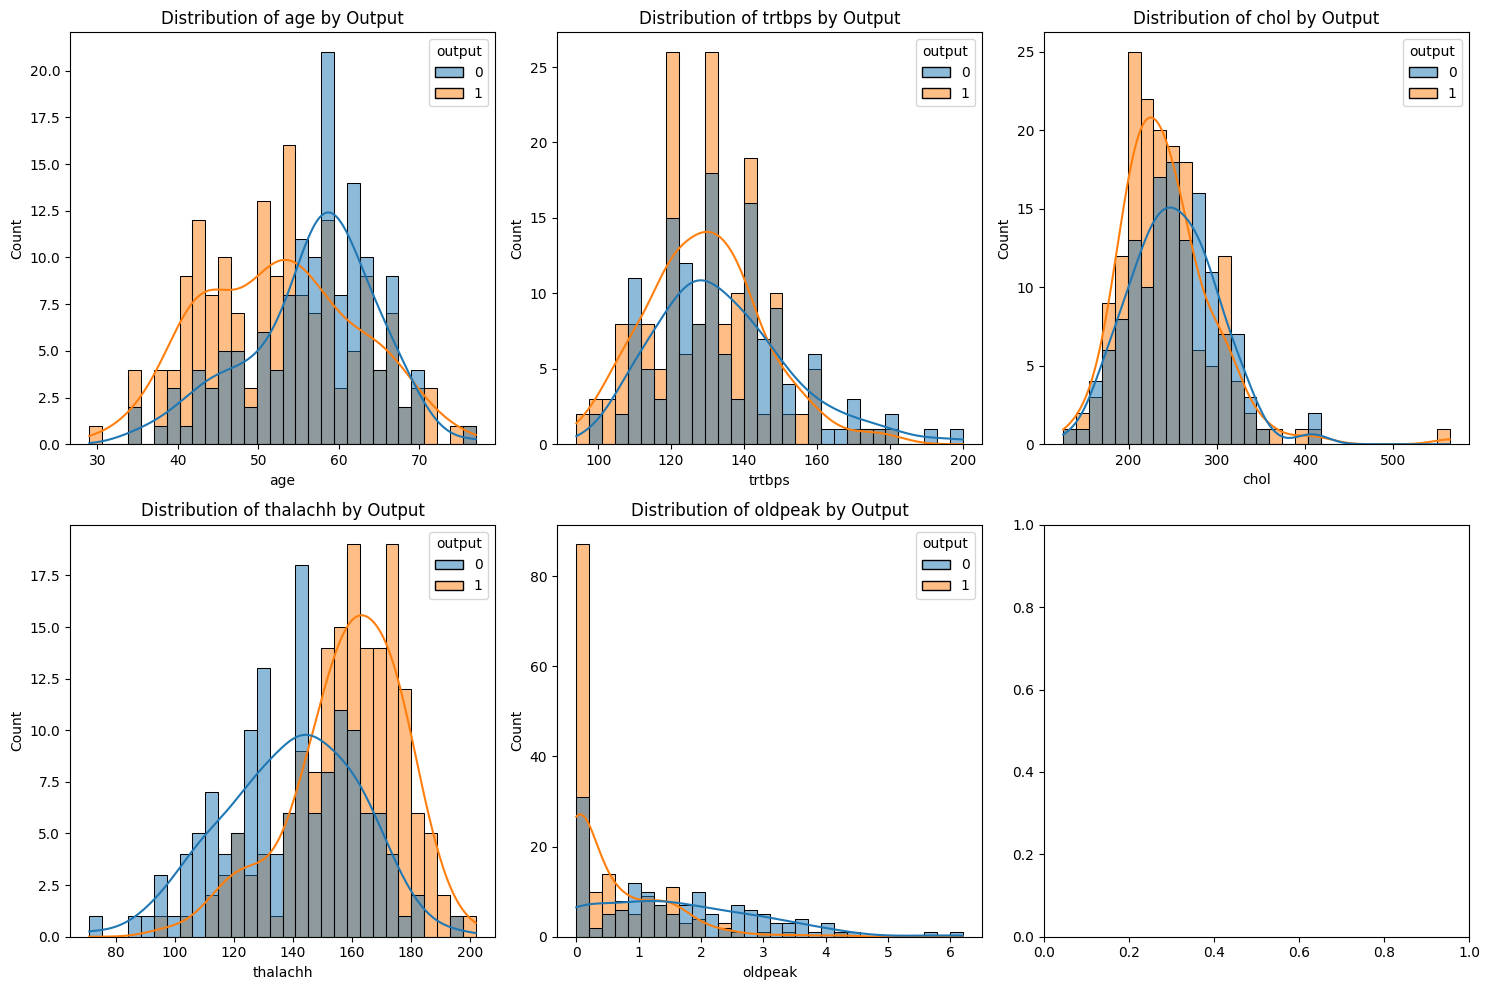

In [50]:
# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=data_df, x=var, hue="output", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} by Output")

plt.tight_layout()
plt.show()


## Step 5 questions
### what can you conclude about the plots, are there any interesting findings
The plots suggest that oldpeak tends to be lower in individuals with heart disease which is making it a significant factor. Thalach appears higher in those with heart disease which is an interesting trend and can be seen across all of th plots. Cholesterol (chol) has a similar distribution across both group which is indicating it may not be a strong predictor. However Resting blood pressure (trtbps) and age show considerable overlap suggesting they may have limited impact in distinguishing heart disease alongside cholesterol.

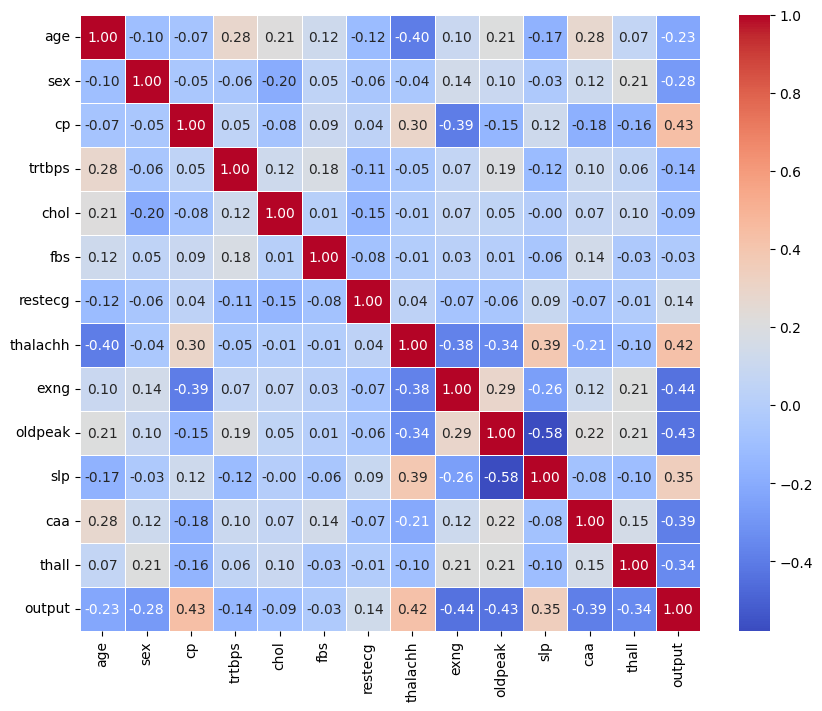

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

## Step 6 questions
### What can you conclude from the heatmap you created? Are there any interesting findings?
Based on the heatmap we can see that there is a couple strong correlations that lead to cardiovascular diseases, a couple of these correlations are between the features cp, thalacth, exng, oldpeak, age. However with all of the strong correlations thalact also shows strong correlations with multiple of the features which could make thalact a very strong predictor for our output. In conclusion chest pain ("cp"), maximum heart rate ("thalacth"), exercise-induced angina ("exng"), and ST depression ("oldpeak") are the strongest predictors of the output variable.

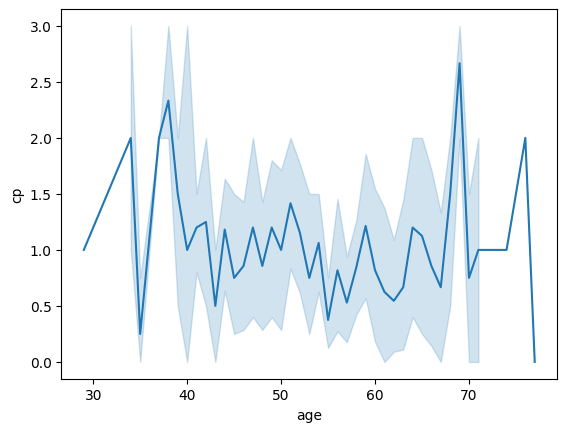

In [52]:
sns.lineplot(x=data_df["age"], y=data_df["cp"])
plt.show()


C:\Users\Bebe\AppData\Local\Temp\ipykernel_12276\1379183582.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="output", y="thalachh", data=data_df, palette="coolwarm", ax=axes[0, 0])
C:\Users\Bebe\AppData\Local\Temp\ipykernel_12276\1379183582.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_df[data_df["output"] == 0]["oldpeak"], shade=True, label="No Heart Disease (0)", color="blue", ax=axes[0, 1])
C:\Users\Bebe\AppData\Local\Temp\ipykernel_12276\1379183582.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_df[data_df["output"] == 1]["oldpeak"], shade=True, label="Heart D

Text(0.5, 1.0, 'Parallel Coordinates: Multiple Features')

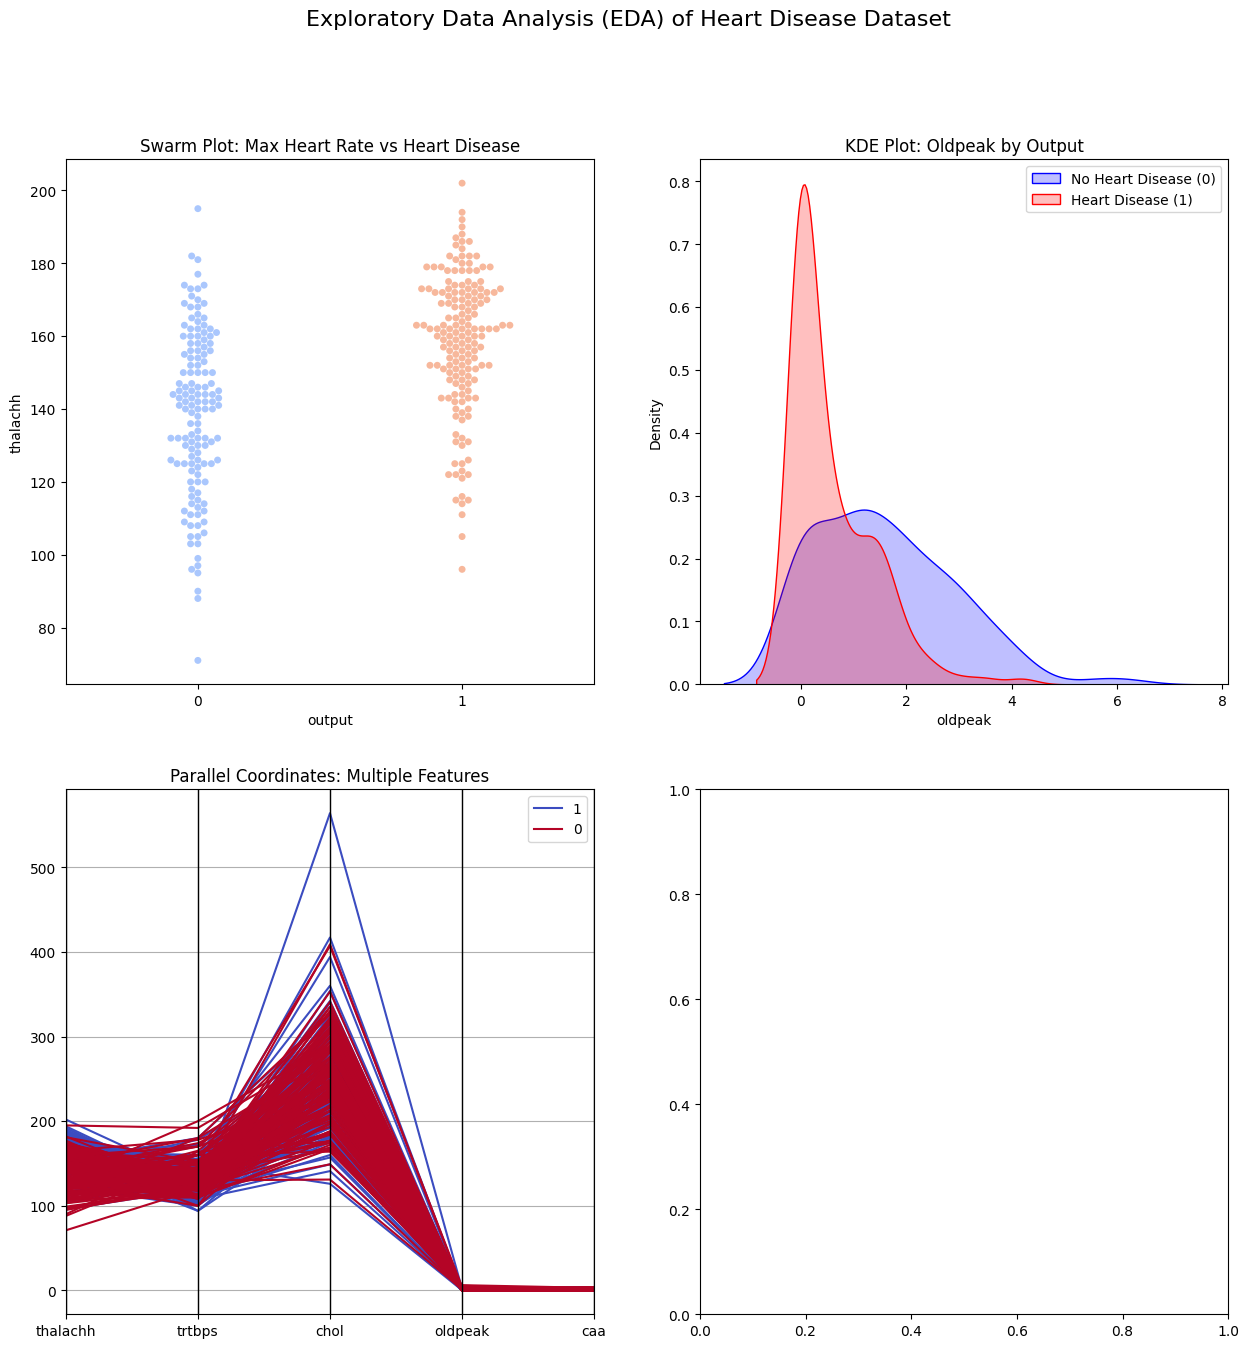

In [53]:
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import parallel_coordinates


# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 3 rows, 2 columns
fig.suptitle("Exploratory Data Analysis (EDA) of Heart Disease Dataset", fontsize=16)

# Swarm Plot - Max Heart Rate (thalachh) vs Output
sns.swarmplot(x="output", y="thalachh", data=data_df, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Swarm Plot: Max Heart Rate vs Heart Disease")

# KDE Plot - Oldpeak Distribution by Output
sns.kdeplot(data_df[data_df["output"] == 0]["oldpeak"], shade=True, label="No Heart Disease (0)", color="blue", ax=axes[0, 1])
sns.kdeplot(data_df[data_df["output"] == 1]["oldpeak"], shade=True, label="Heart Disease (1)", color="red", ax=axes[0, 1])
axes[0, 1].set_title("KDE Plot: Oldpeak by Output")
axes[0, 1].legend()

# Parallel Coordinates Plot - Multi-Feature Trends
selected_features = ["thalachh", "trtbps", "chol", "oldpeak", "caa"]
parallel_coordinates(data_df[["output"] + selected_features], class_column="output", colormap="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Parallel Coordinates: Multiple Features")


## Step 7 questions
### What can you conclude from the plots that you created? Did you find anything interesting?
From further exploration it can be seen that the distribution of heart rates for patients withouth heart disease is broad but generally the heart rate is in the lower ranges in comparison to patients that are positive in heart disease, also from looking at the kde plot we can see that patients without heart disease have outliers with high levels of ST depression.

### Step 8 Questions

#### Name two different models that you can use to solve the problem statement.
The two different models that I used to solve the problem statement are logistic regression since its simple and a very effective model for binary classification and Random Forest since it uses decision trees and provides high accuracy especially when handling nonlinear relationships
####  What is the difference between label encoding and one hot encoding, and when should you use one over the other?
Label enconding converts categorical values into numerical values and it is better to be used when the categorical features are ordinal for example ( low < medium < high), while one hot encoding creates new binary columns of the data to map and it is better to be used when the categorical features are not ordinal for example (sex or colors)
#### What is multicollinearity, and why do we care about it when creating models ? How can we check to see if there's significant multicollinearity in our data?
Multicollinearity occurs when two or more predictor variables are highly correlated which makes it difficult for the model to distinguish their individual effects and it is important to find out since it can inflate the variance in the estimate of the coefficients causing unstable predictions. One way to check if there is significant multicollinearity is to check the variance inflation factor or VIF, if the VIF is high normally greater than 5 there is strong multicollinearity.
#### Why is scaling data important?
Machine learning models are sensitive to feature scaling for example logistic regression or KNN, and this can cause features that have large ranges to have more impact over features that have smaller ranges just based on the range. Because of this data scaling is important to standardize and normalize the data so that all the features contribute equally to the models prediction.
#### For the two different models that you named earlier, are they using a parametric or non parametric learning algorithm? What's the difference
For the logistic regression model 
#### Suppose that we had missing values in our dataset. What are different ways we could handle them?
There is several things that we can do when there is missing values in the dataset we can drop the rows that have the missing data if the dataset is large and there is very few missing values, we can ignore the missing values (Not a good idea), or we can imputate by inserting values into the missing cells, this can be done by several ways for example using the mean/meadian/mode for the imputation, using the simpleImputer or the KNNImputer to fill in the missing values.

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ["cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
num_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])


In [55]:
from sklearn.model_selection import train_test_split

X = data_df.drop("output", axis=1)
y = data_df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

[[20  8]
 [ 3 30]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61

[[18 10]
 [ 4 29]]
--------------------------------------------------


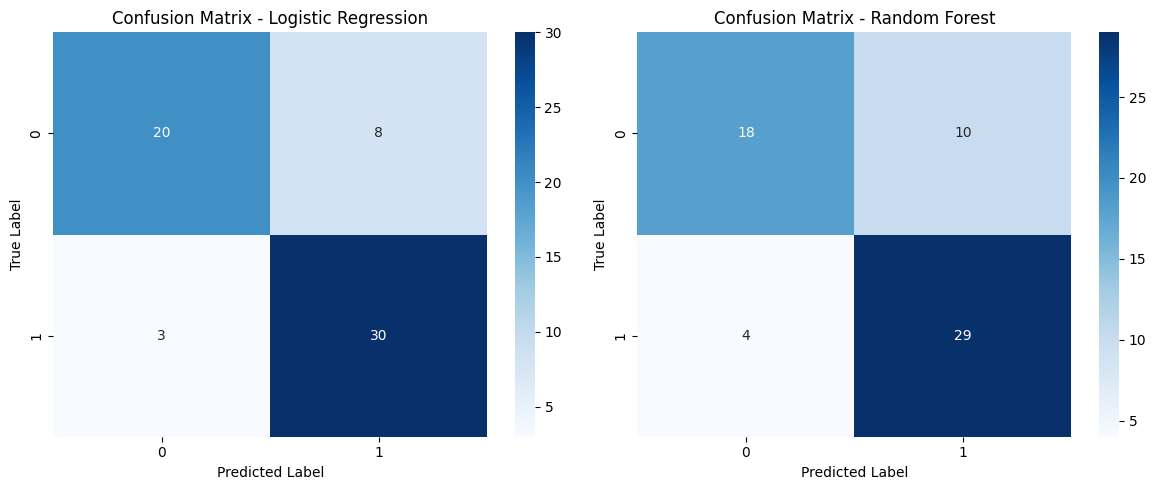

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create subplots

for idx, (name, model) in enumerate(models.items()):
    pipe = Pipeline([("preprocess", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [57]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(Pipeline([("preprocess", preprocessor), ("model", model)]),
                             X, y, cv=5, scoring="accuracy")
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.8381
Random Forest Cross-Validation Accuracy: 0.8282


## Step 9 questions
### Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other?
After exploring the data I found that the distribution between the age showed that higher ages lead to higher chances of cardiovascular disease. In order to discover more about the data I chose logistic regression and Random Forest for my two models. Before training the two models, I applied data scaling using StandardScaler as Logistic Regression benefits from normalized data for better convergence. The reason I selected these two models is to compare a linear approach (Logistic Regression) with a non-linear ensemble method (Random Forest) to see how they handle the dataset differently. After running the code I found that Logistic Regression achieved higher accuracy (82%) compared to Random Forest (77%), with better recall (91%) for class 1, indicating it performed well in identifying positive cases. However, Random Forest provided more balanced results, with slightly lower precision but better generalization. After creating the confusion matrices it showed that Logistic Regression made fewer false negatives, making it preferable for applications where minimizing missed positive cases is crucial especially in this dataset.